# 1. 패키지 준비

- 나는 "code"라는 이름으로 이번 프로젝트 작업용 패키지를 설치해두었다.  
- 이렇게 프로젝트마다 별도로 최소한의 패키지를 설치하고 최적화해야 충돌이 일어나지 않는다.  
- 돈 안 내고 공개소프트웨어와 패키지를 활용할 때는 늘 충돌 때문에 골머리를 앓게 되는데, 이를 피하는 방법이다.

In [2]:
using Pkg
Pkg.activate("code")

  Activating environment at `G:\내 드라이브\ABM\경제코드\2.청년가구의 방\code\Project.toml`


- 아래와 같이 CSV, 데이터프레임 등 몇몇 패키지만 설치되어 있다.  
- 작업할 때마다 메인 프로젝트에 계속 추가로 패키지를 설치하면 수십개 패키지가 설치되어 있게 마련인데, 최소화한 상태다.

In [3]:
@show Pkg.status()

     Project code v0.1.0
      Status `G:\내 드라이브\ABM\경제코드\2.청년가구의 방\code\Project.toml`
  [336ed68f] CSV v0.8.5 ⚲
  [13f3f980] CairoMakie v0.7.0
  [a93c6f00] DataFrames v1.3.1
  [c91e804a] Gadfly v1.3.4
  [ee78f7c6] Makie v0.16.1
  [fdbf4ff8] XLSX v0.7.8
  [f43a241f] Downloads
  [37e2e46d] LinearAlgebra
Pkg.status() = nothing


- 이 가운데 이번 프로젝트 데이터작업을 위한 CSV와 DataFrames, 그래픽 작업을 위한 CairoMakie, 수치 연산 편의성을 위한 LinearAlgebra만 사용한다. 

# 2. 전체 1인 가구 데이터 분석

## 2.1. 데이터프레임 구축

In [4]:
using CSV, CairoMakie, DataFrames, LinearAlgebra

- 아래와 같이 두 CSV파일을 읽은 뒤 컬럼 이름을 바꾸고 연도 코드를 연도명으로 바꾼다.  
- 두 개의 CSV 파일은 통계청에서 2020년 인구주택총조사 표본조사 결과를 아래아한글 파일로 공개해둔 것을 직접 입력한 것이다.  
- age는 1번이 20대, 2번이 30대, 3번이 40대, 4번이 50대, 5번이 60대, 6번이 70대 이상이다.  
- year는 1번이 2015년, 2번이 2020년이다.

In [7]:
room15 = CSV.read("G:\\내 드라이브\\ABM\\경제코드\\2.청년가구의 방\\세대별사용방수_2015.csv", DataFrame, header=true)
room20 = CSV.read("G:\\내 드라이브\\ABM\\경제코드\\2.청년가구의 방\\세대별사용방수_2020.csv", DataFrame, header=true)
rename!(room15, :Column1 => :age)
rename!(room20, :Column1 => :age)
@show insertcols!(room15, 2, :year => 1, :years => "2015년") # 1 = year 2015
@show insertcols!(room20, 2, :year => 2, :years => "2020년") # 2 = year 2020

insertcols!(room15, 2, :year => 1, :years => "2015년") = 6×7 DataFrame
 Row │ age    year   years   1      2      3      4
     │ Int64  Int64  String  Int64  Int64  Int64  Int64
─────┼──────────────────────────────────────────────────
   1 │     1      1  2015년    561    134     92     91
   2 │     2      1  2015년    317    143    181    183
   3 │     3      1  2015년    215    133    201    211
   4 │     4      1  2015년    171    149    257    284
   5 │     5      1  2015년     81    111    232    311
   6 │     6      1  2015년     73    161    380    540
insertcols!(room20, 2, :year => 2, :years => "2020년") = 6×7 DataFrame
 Row │ age    year   years   1      2      3      4
     │ Int64  Int64  String  Int64  Int64  Int64  Int64
─────┼──────────────────────────────────────────────────
   1 │     1      2  2020년    399    457    308    179
   2 │     2      2  2020년    164    294    334    324
   3 │     3      2  2020년    115    172    283    333
   4 │     4      2  2020년    126  

,age,year,years,1,2,3,4
,Int64,Int64,String,Int64,Int64,Int64,Int64
1,1,2,2020년,399,457,308,179
2,2,2,2020년,164,294,334,324
3,3,2,2020년,115,172,283,333
4,4,2,2020년,126,169,339,405
5,5,2,2020년,92,135,354,458
6,6,2,2020년,61,140,424,578


- 2015, 2020년 각각 다른 데이터프레임에 들어 있는데, 이 두 개를 합쳐 rooms라는 하나의 데이터프레임으로 바꾼다.  
- 이때 데이터는 longform으로 바꾸어 CairoMakie에서 작업하기 편하게 변환한다.  

In [8]:
rooms = vcat(stack(room15, [:4, :5, :6, :7]), stack(room20, [:4, :5, :6, :7]))

,age,year,years,variable,value
,Int64,Int64,String,String,Int64
1,1,1,2015년,1,561
2,2,1,2015년,1,317
3,3,1,2015년,1,215
4,4,1,2015년,1,171
5,5,1,2015년,1,81
6,6,1,2015년,1,73
7,1,1,2015년,2,134
8,2,1,2015년,2,143
9,3,1,2015년,2,133


- 방 갯수가 문자열(string) type으로 되어 있는데, CairoMakie에서 인식할 수 있도록 정수(Integer) type으로 바꿔준다.

In [9]:
rooms.room = parse.(Int, rooms.variable)
#rooms.num = parse.(Float64, rooms.value)

48-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 2
 2
 2
 2
 2
 2
 3
 ⋮
 3
 3
 3
 3
 3
 3
 4
 4
 4
 4
 4
 4

## 2.2. 그래프 그리기

- CairoMakie를 활용해 세대별, 사용 방 수별 가구수를 Barplot으로 그린다.  
- 가로축은 세대, 세대 내 두 개의 바는 왼쪽이 2015년이고 오른쪽이 2020년이다.  
- 세로축은 세대 전체에서 해당 갯수의 방을 사용하는 1인 가구의 수다.

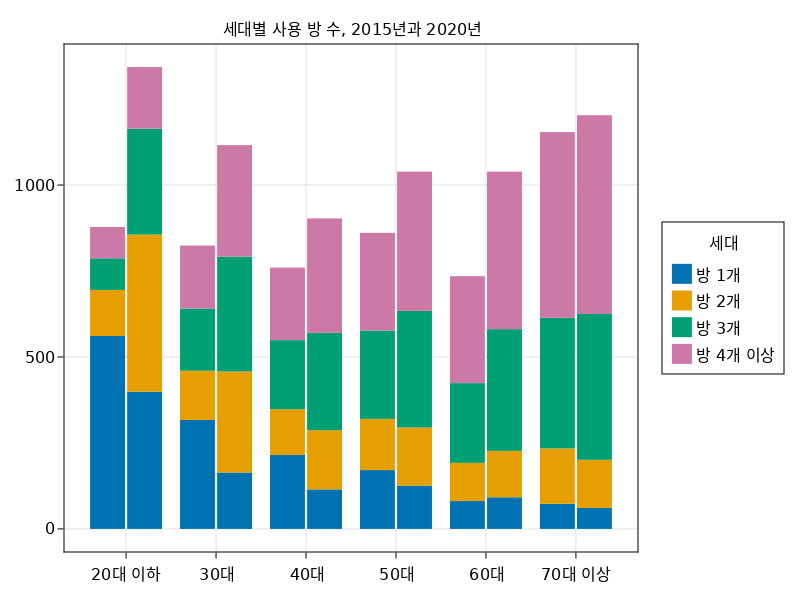

In [10]:
colors = Makie.wong_colors()

# Figure and Axis
fig = Figure()
ax = Axis(fig[1,1], xticks = (1:6, ["20대 이하", "30대", "40대", "50대", "60대", "70대 이상"]),
        title = "세대별 사용 방 수, 2015년과 2020년")

# Plot
barplot!(ax, rooms.age, rooms.value, stack = rooms.room, dodge = rooms.year,
        color = colors[rooms.room])

# Legend
labels = ["방 1개", "방 2개", "방 3개", "방 4개 이상"]
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(labels)]
title = "세대"

Legend(fig[1,2], elements, labels, title)

fig

- 확실히 1인가구가 늘어나고 있으나, 단칸방 사는 1인가구는 오히려 줄고 있으며, 젊을수록 변화가 크다는 점을 알 수 있었다.
- 그런데 여기까지 그려놓고 주변에 보여주니, 너무 복잡해서 이해가 어렵다는 평이 많았다.  
- 분석가나 chartist에게는 훌륭한 그래프일 수 있으나, 일반인에게는 너무 어렵겠다는 생각이 들었다.  
- 이 글의 주제인 20대만 따로 빼내 그래프를 그리기로 했다.

# 3. 20대 1인 가구 데이터 분석

## 3.1. 가구수 분석

### 3.1.2. 데이터프레임 구축

- 전체 1인가구 데이터에서 20대 1인 가구만 뽑아내 분석해 본다.  
- 먼저 전체 데이터프레임을 재구축한다.

In [24]:
room15 = CSV.read("G:\\내 드라이브\\ABM\\경제코드\\2.청년가구의 방\\세대별사용방수_2015.csv", DataFrame, header=true)
room20 = CSV.read("G:\\내 드라이브\\ABM\\경제코드\\2.청년가구의 방\\세대별사용방수_2020.csv", DataFrame, header=true)
rename!(room15, :Column1 => :age)
rename!(room20, :Column1 => :age)
@show insertcols!(room15, 2, :year => 1, :years => "2015년") # 1 = year 2015
@show insertcols!(room20, 2, :year => 2, :years => "2020년") # 2 = year 2020

insertcols!(room15, 2, :year => 1, :years => "2015년") = 6×7 DataFrame
 Row │ age    year   years   1      2      3      4
     │ Int64  Int64  String  Int64  Int64  Int64  Int64
─────┼──────────────────────────────────────────────────
   1 │     1      1  2015년    561    134     92     91
   2 │     2      1  2015년    317    143    181    183
   3 │     3      1  2015년    215    133    201    211
   4 │     4      1  2015년    171    149    257    284
   5 │     5      1  2015년     81    111    232    311
   6 │     6      1  2015년     73    161    380    540
insertcols!(room20, 2, :year => 2, :years => "2020년") = 6×7 DataFrame
 Row │ age    year   years   1      2      3      4
     │ Int64  Int64  String  Int64  Int64  Int64  Int64
─────┼──────────────────────────────────────────────────
   1 │     1      2  2020년    399    457    308    179
   2 │     2      2  2020년    164    294    334    324
   3 │     3      2  2020년    115    172    283    333
   4 │     4      2  2020년    126  

,age,year,years,1,2,3,4
,Int64,Int64,String,Int64,Int64,Int64,Int64
1,1,2,2020년,399,457,308,179
2,2,2,2020년,164,294,334,324
3,3,2,2020년,115,172,283,333
4,4,2,2020년,126,169,339,405
5,5,2,2020년,92,135,354,458
6,6,2,2020년,61,140,424,578


- 전체 1인가구 분석 때와 마찬가지로 longform으로 변환하며 두 개 연도 데이터를 합친다.

In [25]:
rooms = vcat(stack(room15, [:4, :5, :6, :7]), stack(room20, [:4, :5, :6, :7]))

,age,year,years,variable,value
,Int64,Int64,String,String,Int64
1,1,1,2015년,1,561
2,2,1,2015년,1,317
3,3,1,2015년,1,215
4,4,1,2015년,1,171
5,5,1,2015년,1,81
6,6,1,2015년,1,73
7,1,1,2015년,2,134
8,2,1,2015년,2,143
9,3,1,2015년,2,133


- 위와 마찬가지로 정수형으로 변환한다.

In [26]:
rooms.room = parse.(Int, rooms.variable)
#rooms.num = parse.(Float64, rooms.value)

48-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 2
 2
 2
 2
 2
 2
 3
 ⋮
 3
 3
 3
 3
 3
 3
 4
 4
 4
 4
 4
 4

- 20대 데이터만 subset으로 뽑아내 rooms_20 데이터프레임을 별도로 만든다.

In [27]:
rooms_20 = subset(rooms, :age => x -> x .== (1))

,age,year,years,variable,value,room
,Int64,Int64,String,String,Int64,Int64
1,1,1,2015년,1,561,1
2,1,1,2015년,2,134,2
3,1,1,2015년,3,92,3
4,1,1,2015년,4,91,4
5,1,2,2020년,1,399,1
6,1,2,2020년,2,457,2
7,1,2,2020년,3,308,3
8,1,2,2020년,4,179,4


### 3.1.2. 그래프 그리기

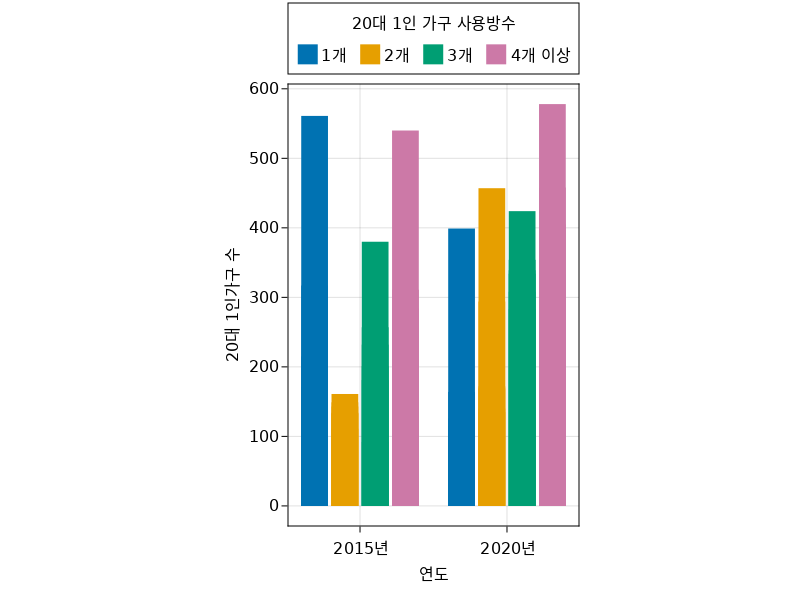

In [28]:
colors = Makie.wong_colors()

# Figure and Axis
fig = Figure()
ax = Axis(fig[1,1], xticks = (1:2, ["2015년", "2020년"]),
        xlabel = "연도", ylabel = "20대 1인가구 수")

supertitle = Label(fig[0, :], "20대 가구 사용 방 수", textsize = 30)

# Plot
barplot!(ax, rooms.year, rooms.value, dodge = rooms.room,
        color = colors[rooms.room])

# Legend
labels = ["1개", "2개", "3개", "4개 이상"]
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(labels)]
title = "20대 1인 가구 사용방수"

Legend(fig[1,1], elements, labels, title, orientation=:horizontal, tellwidth = true, tellheight=false)

fig

## 3.2. 가구 비중 분석

- 상황을 좀 더 명확하게 파악하기 위해, 20대 1인가구 중 사용방수별로 차지하는 비중을 보기로 했다.  
- 때로는 절대수치를 보는 것보다 비중을 보는 게 더 정확할 때가 있다.

### 3.2.1. 데이터프레임 구축

- 전체 1인가구 데이터에서 20대 1인 가구만 뽑아내 분석해 본다.  
- 먼저 전체 데이터프레임을 재구축한다.

In [29]:
room15 = CSV.read("G:\\내 드라이브\\ABM\\경제코드\\2.청년가구의 방\\세대별사용방수_비율_2015.csv", DataFrame, header=true)
room20 = CSV.read("G:\\내 드라이브\\ABM\\경제코드\\2.청년가구의 방\\세대별사용방수_비율_2020.csv", DataFrame, header=true)
rename!(room15, :Column1 => :age)
rename!(room20, :Column1 => :age)
@show insertcols!(room15, 2, :year => 1, :years => "2015년") # 1 = year 2015
@show insertcols!(room20, 2, :year => 2, :years => "2020년") # 2 = year 2020

insertcols!(room15, 2, :year => 1, :years => "2015년") = 6×7 DataFrame
 Row │ age    year   years   1          2         3         4
     │ Int64  Int64  String  Float64    Float64   Float64   Float64
─────┼───────────────────────────────────────────────────────────────
   1 │     1      1  2015년  0.638952   0.15262   0.104784  0.103645
   2 │     2      1  2015년  0.385176   0.173755  0.219927  0.222357
   3 │     3      1  2015년  0.282895   0.175     0.264474  0.277632
   4 │     4      1  2015년  0.198606   0.173055  0.29849   0.329849
   5 │     5      1  2015년  0.110204   0.15102   0.315646  0.423129
   6 │     6      1  2015년  0.0632582  0.139515  0.329289  0.467938
insertcols!(room20, 2, :year => 2, :years => "2020년") = 6×7 DataFrame
 Row │ age    year   years   1          2         3         4
     │ Int64  Int64  String  Float64    Float64   Float64   Float64
─────┼───────────────────────────────────────────────────────────────
   1 │     1      2  2020년  0.297096   0.340283  0.2

,age,year,years,1,2,3,4
,Int64,Int64,String,Float64,Float64,Float64,Float64
1,1,2,2020년,0.297096,0.340283,0.229337,0.133284
2,2,2,2020년,0.147085,0.263677,0.299552,0.290583
3,3,2,2020년,0.127212,0.190265,0.313053,0.368363
4,4,2,2020년,0.12127,0.162656,0.326275,0.389798
5,5,2,2020년,0.0885467,0.129933,0.340712,0.440808
6,6,2,2020년,0.0507488,0.116473,0.352745,0.480865


- 전체 1인가구 분석 때와 마찬가지로 longform으로 변환하며 두 개 연도 데이터를 합친다.

In [30]:
rooms = vcat(stack(room15, [:4, :5, :6, :7]), stack(room20, [:4, :5, :6, :7]))

,age,year,years,variable,value
,Int64,Int64,String,String,Float64
1,1,1,2015년,1,0.638952
2,2,1,2015년,1,0.385176
3,3,1,2015년,1,0.282895
4,4,1,2015년,1,0.198606
5,5,1,2015년,1,0.110204
6,6,1,2015년,1,0.0632582
7,1,1,2015년,2,0.15262
8,2,1,2015년,2,0.173755
9,3,1,2015년,2,0.175


- 위와 마찬가지로 정수형으로 변환한다.

In [31]:
rooms.room = parse.(Int, rooms.variable)
#rooms.num = parse.(Float64, rooms.value)

48-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 2
 2
 2
 2
 2
 2
 3
 ⋮
 3
 3
 3
 3
 3
 3
 4
 4
 4
 4
 4
 4

- 20대 데이터만 subset으로 뽑아내 rooms_20 데이터프레임을 별도로 만든다.

In [32]:
rooms_20 = subset(rooms, :age => x -> x .== (1))

,age,year,years,variable,value,room
,Int64,Int64,String,String,Float64,Int64
1,1,1,2015년,1,0.638952,1
2,1,1,2015년,2,0.15262,2
3,1,1,2015년,3,0.104784,3
4,1,1,2015년,4,0.103645,4
5,1,2,2020년,1,0.297096,1
6,1,2,2020년,2,0.340283,2
7,1,2,2020년,3,0.229337,3
8,1,2,2020년,4,0.133284,4


### 3.2.2. 그래프 그리기

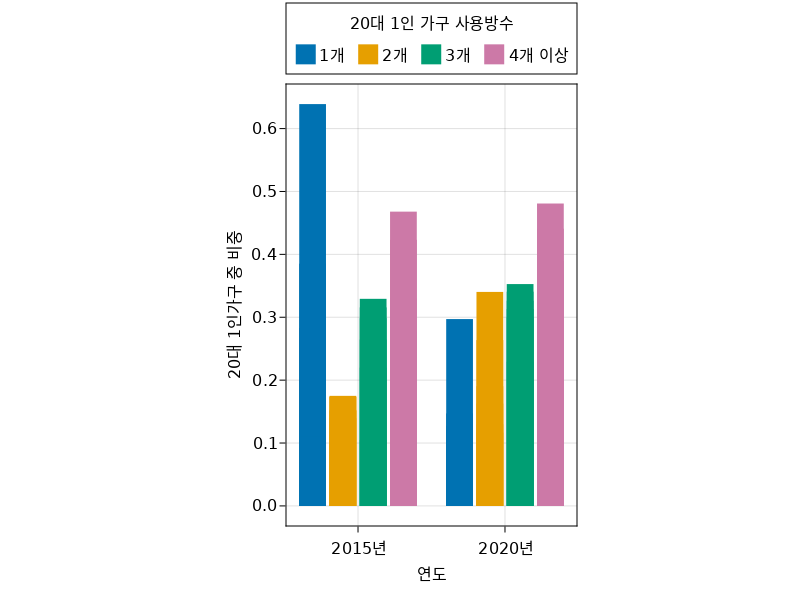

In [33]:
colors = Makie.wong_colors()

# Figure and Axis
fig = Figure()
ax = Axis(fig[1,1], xticks = (1:2, ["2015년", "2020년"]),
        xlabel = "연도", ylabel = "20대 1인가구 중 비중")

supertitle = Label(fig[0, :], "20대 가구 사용 방 수", textsize = 30)

# Plot
barplot!(ax, rooms.year, rooms.value, dodge = rooms.room,
        color = colors[rooms.room])

# Legend
labels = ["1개", "2개", "3개", "4개 이상"]
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(labels)]
title = "20대 1인 가구 사용방수"

Legend(fig[1,1], elements, labels, title, orientation=:horizontal, tellwidth = true, tellheight=false)

fig